# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
'Divy@Narayana'

'Divy@Narayana'

**Connected to Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing libraries**

In [3]:
#libraries required for exploratory analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Loading the dataset**

In [4]:
#loading the dataset from drive
sales_df = pd.read_csv('/content/drive/MyDrive/Rossmann/Rossmann Stores Data.csv')
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_df.shape

(1017209, 9)

In [6]:
#number of unique values in the whole dataset
sales_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

#**Data Cleaning**

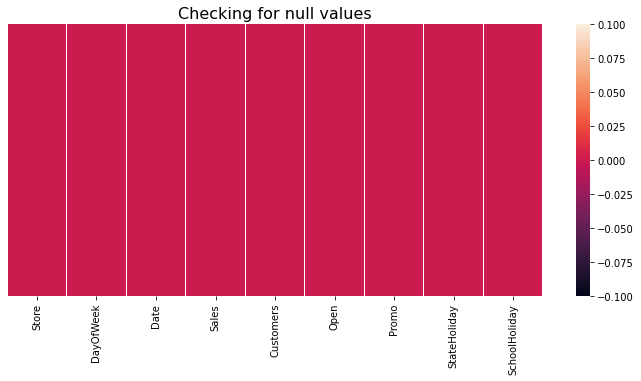

In [7]:
#Checking for null values
plt.figure(figsize=(12,5))
sns.heatmap(sales_df.isnull(), yticklabels=False)
plt.title('Checking for null values', size=16)
plt.show()

The above figure shows that there are no NaN values in the dataset

**Coverting the date time feature**

In [8]:
#changing the format of datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
#creating some additional columns
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day

In [9]:
#data frame after adding the columns
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [10]:
#information of the dataset showing the datatypes of features
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 93.1+ MB


#**Exploratory Analysis**

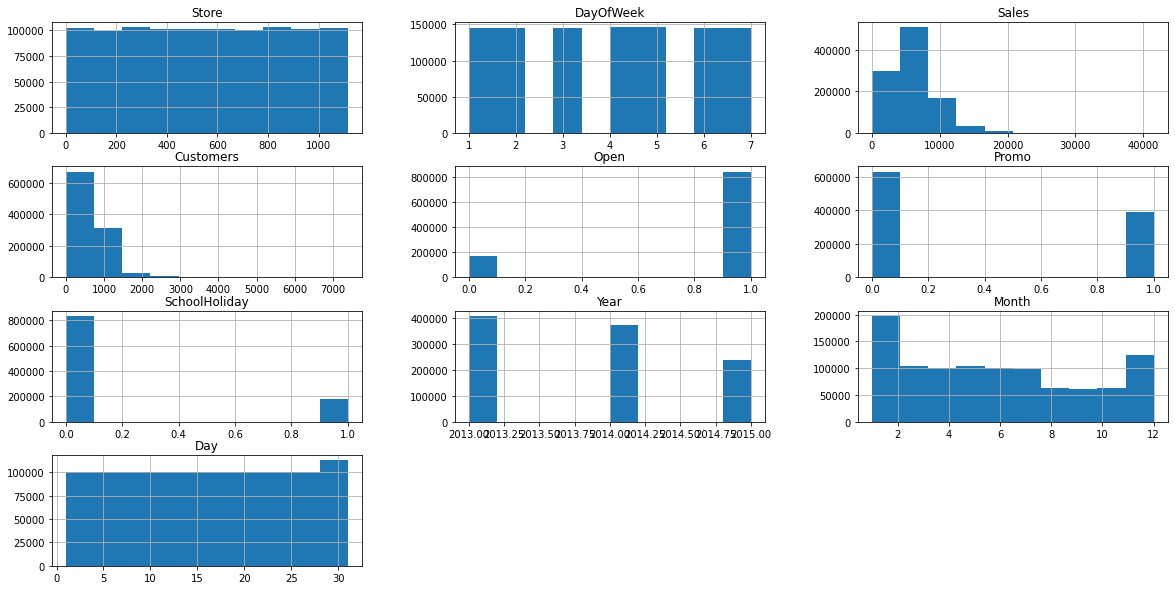

In [11]:
#plotting the given dataset on histogram
sales_df.hist(figsize=(20,10))
plt.show()

**Description of the sales data**

In [12]:
#table showing the mathematical functions on numerical features
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0
Day,1017209.0,15.702790,8.787638,1.0,8.0,16.0,23.0,31.0


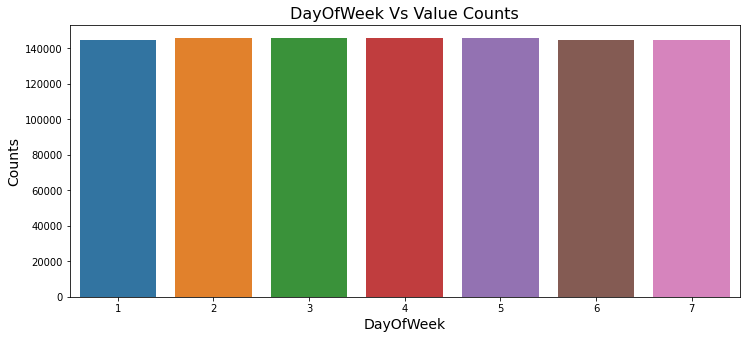

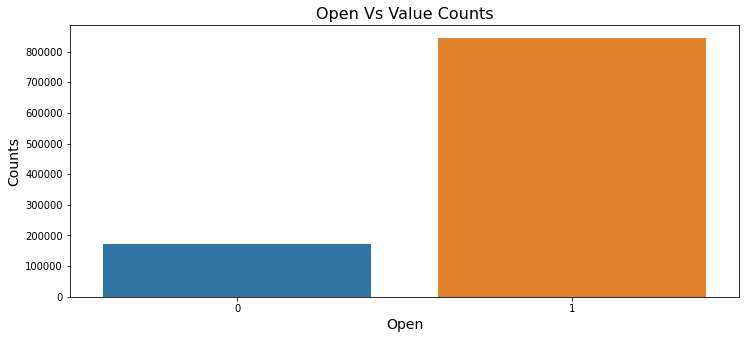

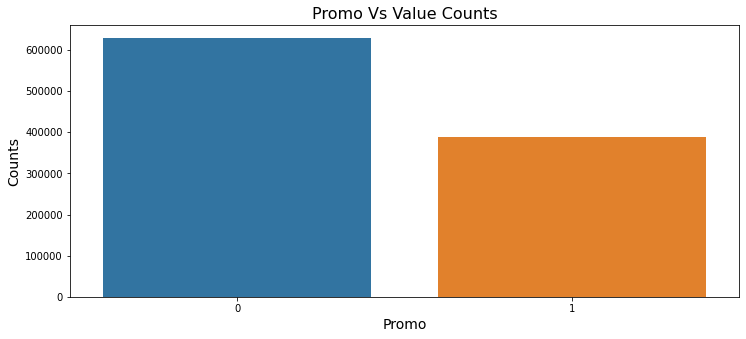

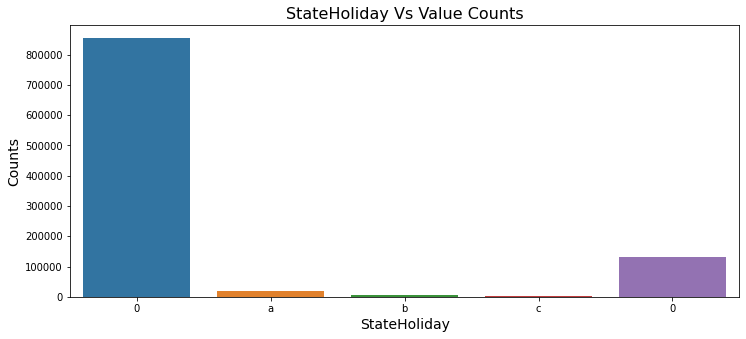

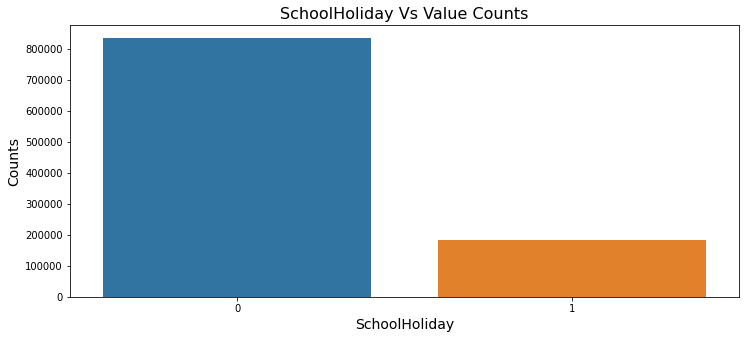

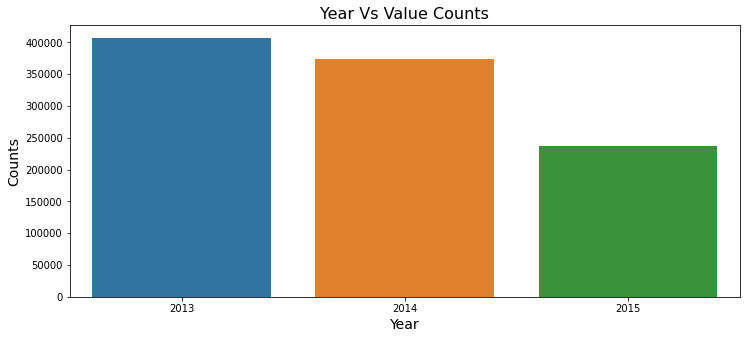

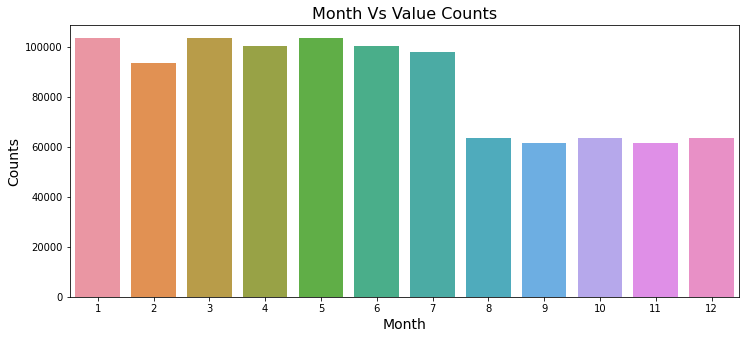

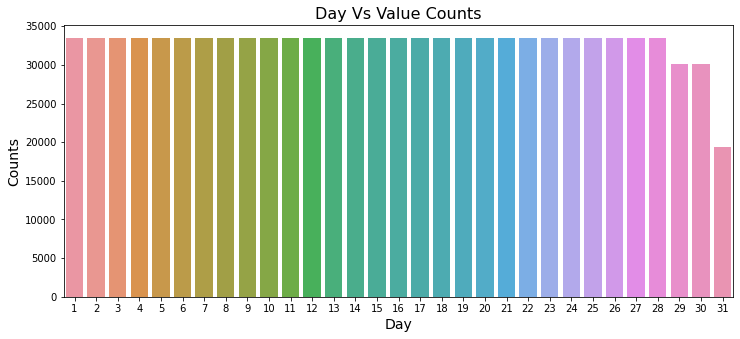

In [13]:
#selecting some features and making a saperate list
features = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']

#visualization of valuecounts
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    ch = sns.countplot(sales_df[col], ax=ax)
    plt.title(f'{col} Vs Value Counts', size=16)
    plt.ylabel('Counts', size=14)
    plt.xlabel(col, size=14)
    plt.show()

**Day of Week Vs Open**

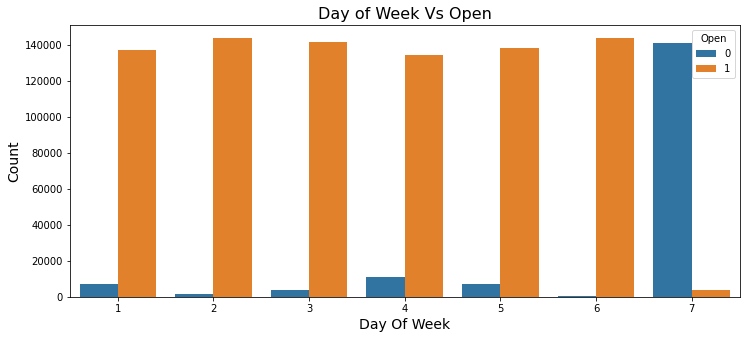

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='DayOfWeek', hue='Open', data=sales_df)
plt.title('Day of Week Vs Open', size=16)
plt.xlabel('Day Of Week', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Sate Holiday Vs Open**

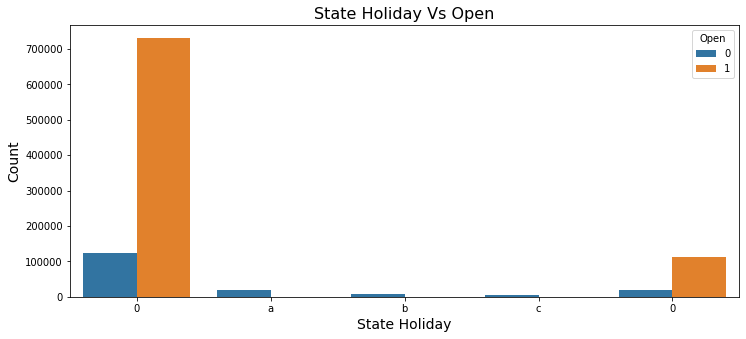

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='StateHoliday', hue='Open', data=sales_df)
plt.title('State Holiday Vs Open', size=16)
plt.xlabel('State Holiday', size=14)
plt.ylabel('Count', size=14)
plt.show()

**School Holiday Vs Open**

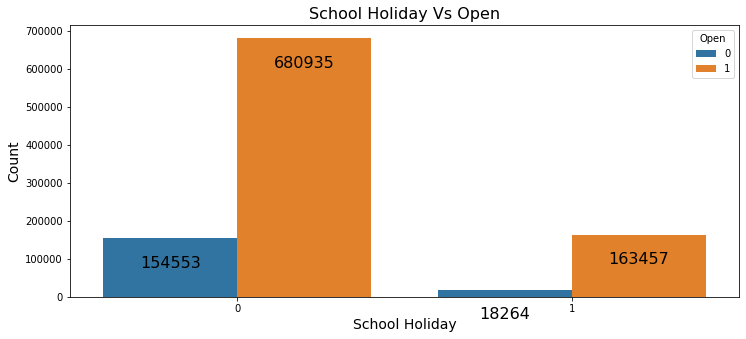

In [16]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='SchoolHoliday', hue='Open', data=sales_df)
plt.title('School Holiday Vs Open', size=16)
plt.xlabel('School Holiday', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Promo Vs Open**

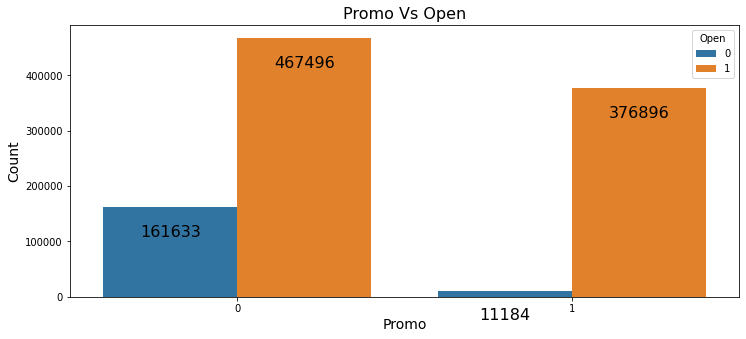

In [17]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Promo', hue='Open', data=sales_df)
plt.title('Promo Vs Open', size=16)
plt.xlabel('Promo', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Customers Vs Sales**

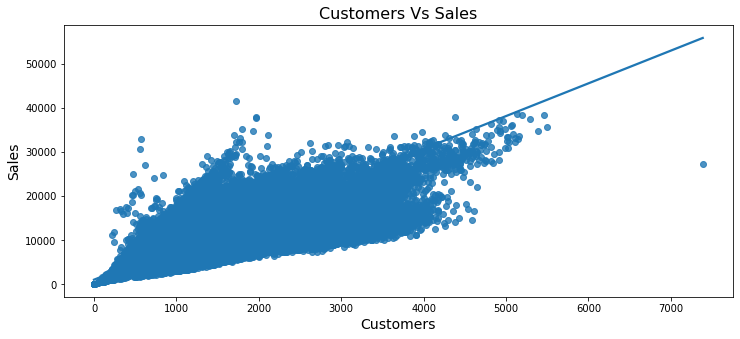

In [18]:
plt.figure(figsize=(12,5))
sns.regplot(x='Customers', y='Sales', data=sales_df)
plt.title('Customers Vs Sales', size=16)
plt.xlabel('Customers', size=14)
plt.ylabel('Sales', size=14)
plt.show()

**Analysis of Sales**

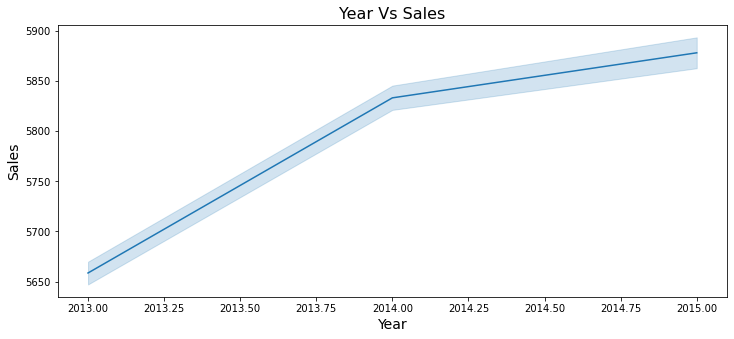

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Year', y='Sales', data=sales_df)
plt.title('Year Vs Sales', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Sales', size=14)
plt.show()

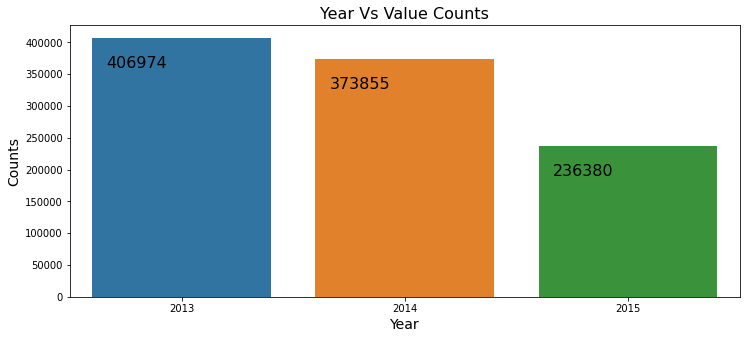

In [20]:
#Year and its vlues counts
plt.figure(figsize=(12,5))
ax = sns.countplot(sales_df['Year'])
plt.title('Year Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

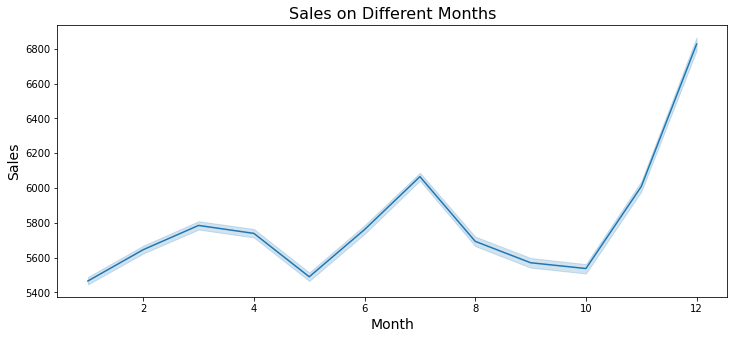

In [21]:
#plotting the data of Sales Behavior on Different Months
plt.figure(figsize=(12,5))
sns.lineplot(x='Month', y='Sales', data=sales_df)
plt.title('Sales on Different Months', size=16)
plt.xlabel('Month', size=14)
plt.ylabel('Sales', size=14)
plt.show()

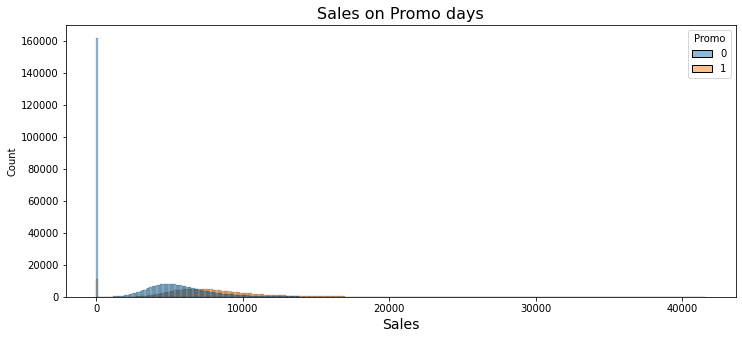

In [22]:
#plotting the data of sales on promo days
plt.figure(figsize=(12,5))
sns.histplot(hue='Promo', x='Sales', data=sales_df)
plt.title('Sales on Promo days', size=16)
plt.xlabel('Sales', size=14)
plt.show()

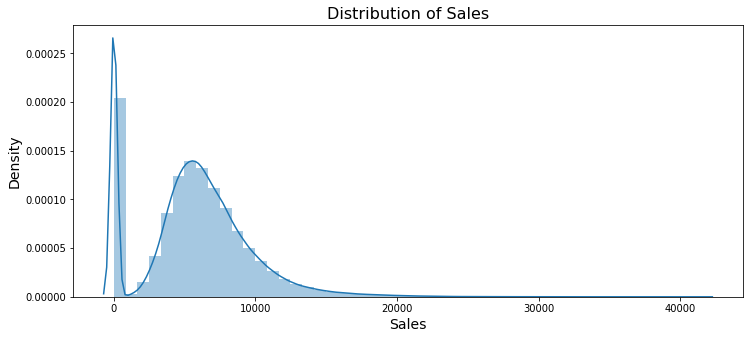

In [23]:
#distribution of sales
plt.figure(figsize=(12,5))
sns.distplot(sales_df['Sales'])
plt.title('Distribution of Sales', size=16)
plt.xlabel('Sales', size=14)
plt.ylabel('Density', size=14)
plt.show()

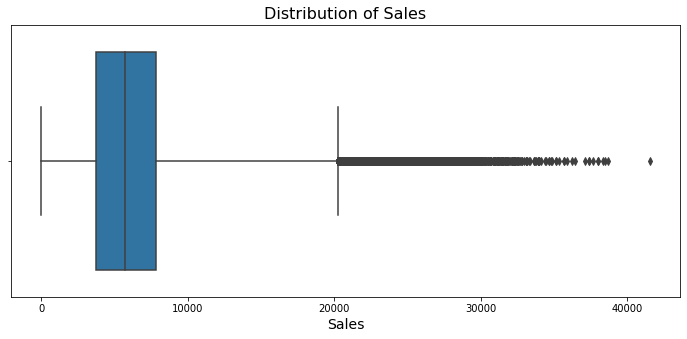

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(sales_df['Sales'], whis=3)
plt.title('Distribution of Sales', size=16)
plt.xlabel('Sales', size=14)
plt.show()

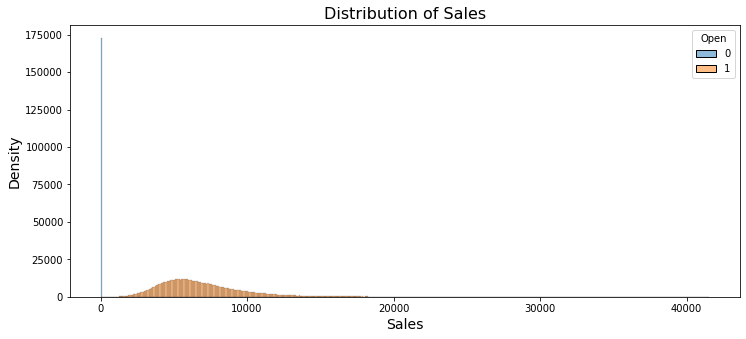

In [25]:
#Salees on Open and close days
plt.figure(figsize=(12,5))
sns.histplot(x='Sales', hue='Open', data=sales_df)
plt.title('Distribution of Sales', size=16)
plt.xlabel('Sales', size=14)
plt.ylabel('Density', size=14)
plt.show()

**Year Vs Stores Open days**

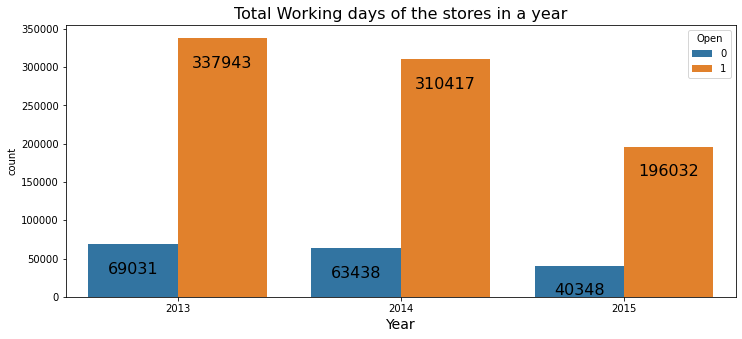

In [26]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Year', hue='Open', data=sales_df)
plt.title('Total Working days of the stores in a year', size=16)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Customers Vs Day of week**

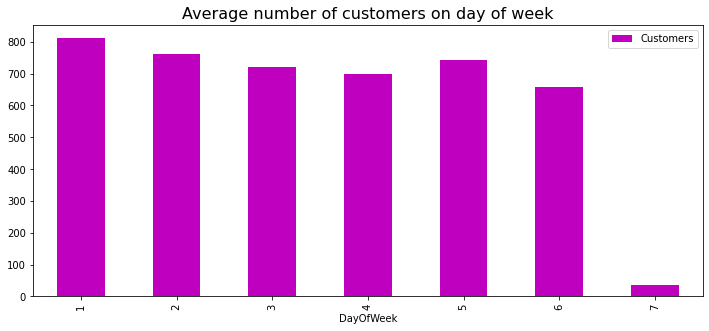

In [27]:
avg_customers = sales_df.groupby(['DayOfWeek']).agg({'Customers':'mean'})

#plotting the data of average number of customers visits in a day
avg_customers.plot(kind='bar', figsize=(12,5), color='m')
plt.title('Average number of customers on day of week', size=16)

plt.show()

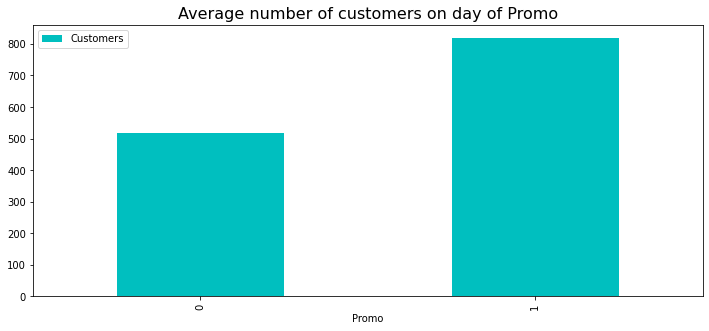

In [28]:
promo_sales = sales_df.groupby(['Promo']).agg({'Customers':'mean'})

promo_sales.plot(kind='bar', figsize=(12,5), color='c')
plt.title('Average number of customers on day of Promo', size=16)

plt.show()

**15 Stores with Hight Sales**

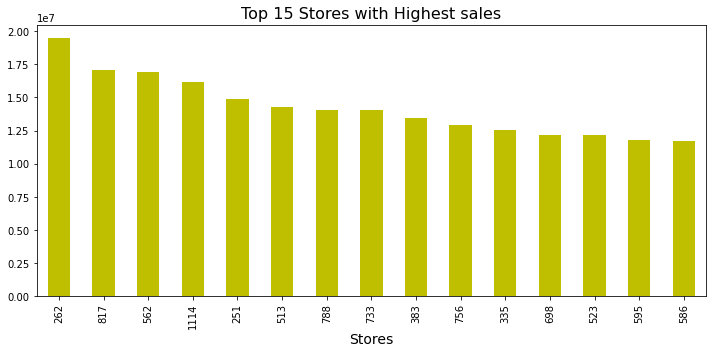

In [29]:
#finding the stores with their sales
stores = sales_df.groupby('Store')['Sales'].sum().sort_values(ascending=False)

#plotting the top 15 stores data
top_stores = stores.head(15)
top_stores.plot(kind='bar', figsize=(12,5), color='y')
plt.title('Top 15 Stores with Highest sales', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**15 Least performing stores**

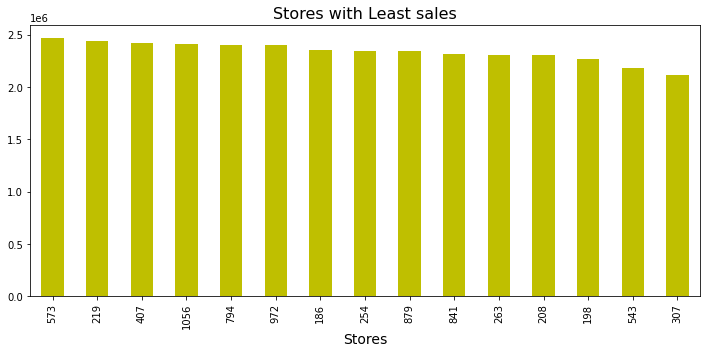

In [30]:
#plotting the top 15 stores data
least_stores = stores.tail(15)
least_stores.plot(kind='bar', figsize=(12,5), color='y')
plt.title('Stores with Least sales', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**Stores with more customers**

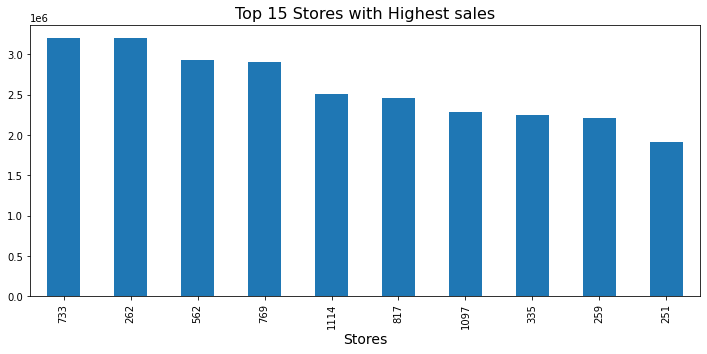

In [31]:
#finding the stores with more customers
cust_stores = sales_df.groupby('Store')['Customers'].sum().sort_values(ascending=False)

#plotting the top 15 stores data
top_stores = cust_stores.head(10)
top_stores.plot(kind='bar', figsize=(12,5))
plt.title('Top 15 Stores with Highest sales', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**Stores with least Customers**

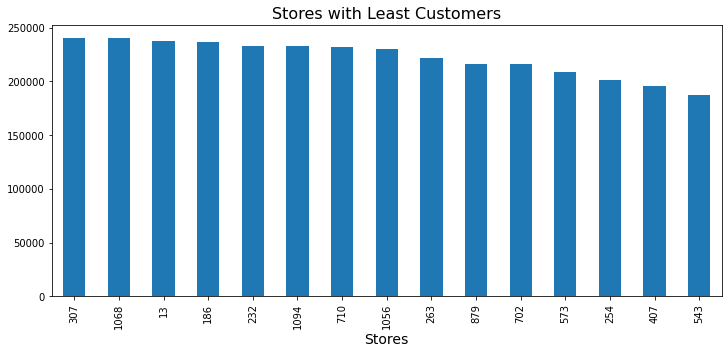

In [32]:
least_stores = cust_stores.tail(15)
least_stores.plot(kind='bar', figsize=(12,5))
plt.title('Stores with Least Customers', size=16)
plt.xlabel('Stores', size=14)
plt.show()

**Importing Stores Data**

In [33]:
stores_df = pd.read_csv('/content/drive/MyDrive/Rossmann/store.csv')
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [34]:
stores_df.shape

(1115, 10)

In [35]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [36]:
stores_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

**Null Values**

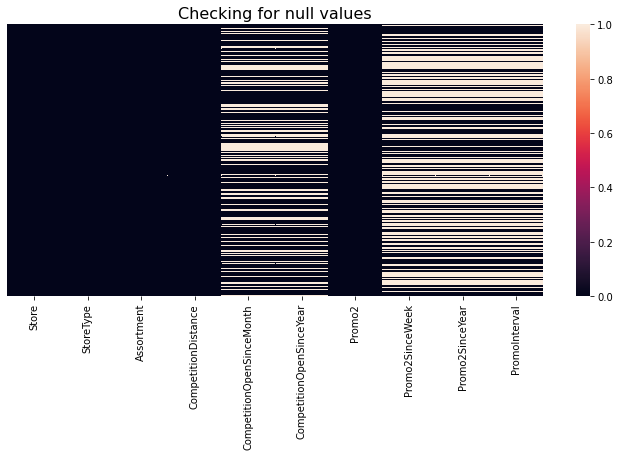

In [37]:
#Checking for null values
plt.figure(figsize=(12,5))
sns.heatmap(stores_df.isnull(), yticklabels=False)
plt.title('Checking for null values', size=16)
plt.show()

**Dropping the columnsing containg the null values**

In [38]:
stores_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 
                'Promo2SinceYear', 'PromoInterval'], axis=1, inplace=True)

In [39]:
stores_df['CompetitionDistance'].fillna(0, inplace=True)

As the data set contains only one null value in Competition Distance Column filling it with 0.

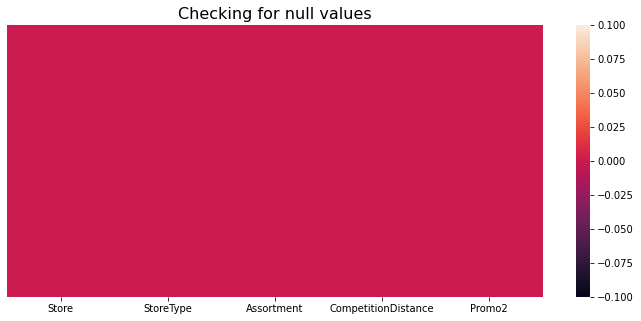

In [40]:
#Checking for null values
plt.figure(figsize=(12,5))
sns.heatmap(stores_df.isnull(), yticklabels=False)
plt.title('Checking for null values', size=16)
plt.show()

**Merging the data frames**

In [41]:
data = pd.merge(left=sales_df, right=stores_df, on='Store', how='left')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


In [42]:
#data frames after merging
data.shape

(1017209, 16)

**Promo2 and its Vlue Counts**

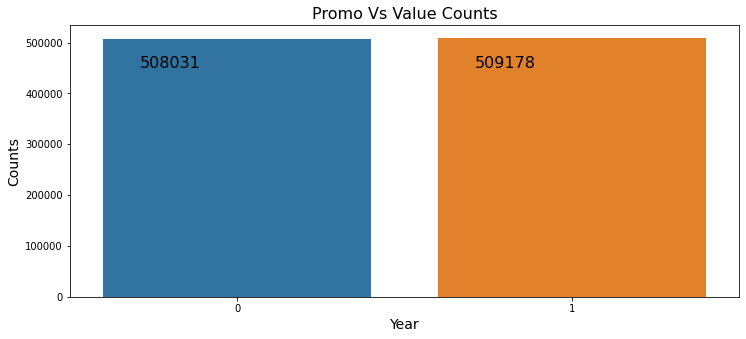

In [43]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Promo2'])
plt.title('Promo Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Assortment Vs Value Counts**

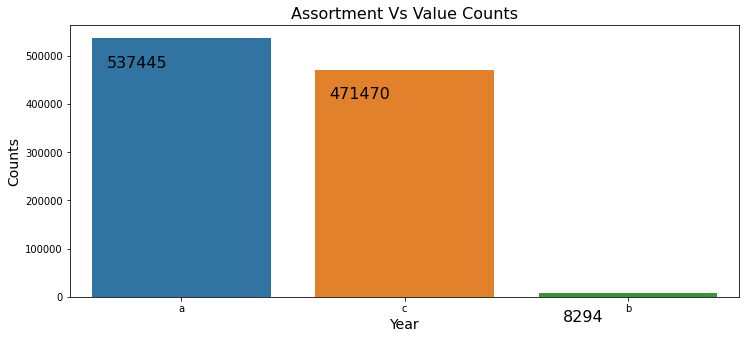

In [44]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Assortment'])
plt.title('Assortment Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Store Type Vs Value Counts**

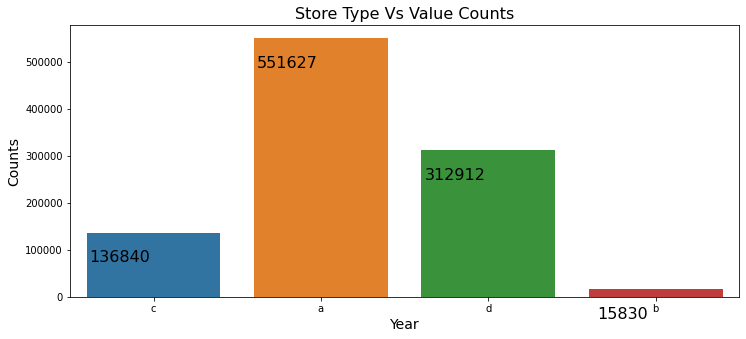

In [45]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['StoreType'])
plt.title('Store Type Vs Value Counts', size=16)
plt.ylabel('Counts', size=14)
plt.xlabel('Year', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**Store type and average customers**

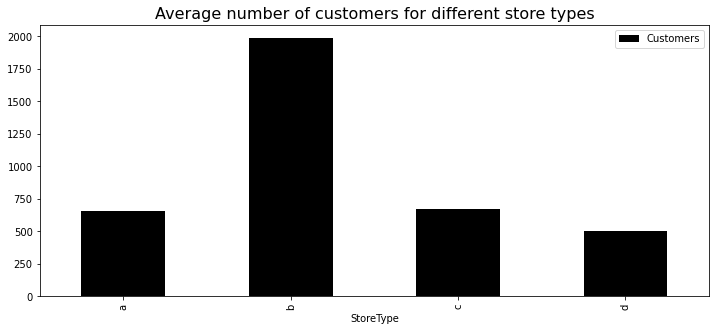

In [46]:
stores_cust = data.groupby(['StoreType']).agg({'Customers':'mean'})

#plotting the data of average number of customers visits type of store
stores_cust.plot(kind='bar', figsize=(12,5), color='k')
plt.title('Average number of customers for different store types', size=16)
plt.show()

**Store Type and average Sales**

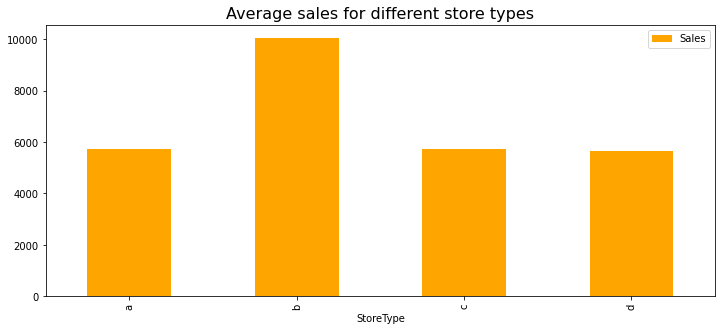

In [47]:
stores_sales = data.groupby(['StoreType']).agg({'Sales':'mean'})

#plotting the data of average number of customers visits in a day
stores_sales.plot(kind='bar', figsize=(12,5), color='orange')
plt.title('Average sales for different store types', size=16)
plt.show()

**Sales on Promo2 Days**

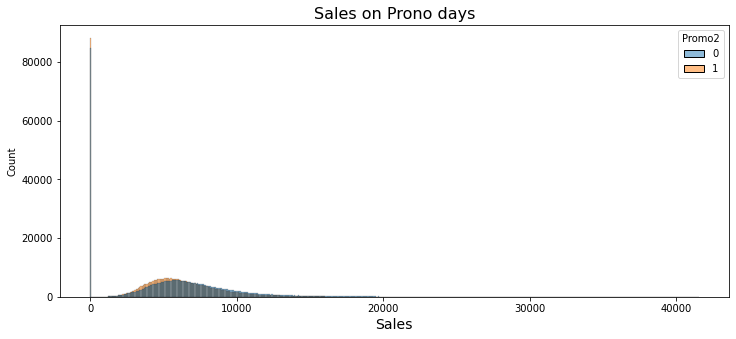

In [48]:
#plotting the data of sales on promo days
plt.figure(figsize=(12,5))
sns.histplot(hue='Promo2', x='Sales', data=data)
plt.title('Sales on Prono days', size=16)
plt.xlabel('Sales', size=14)
plt.show()

**Promo2 Vs Store Open statues**

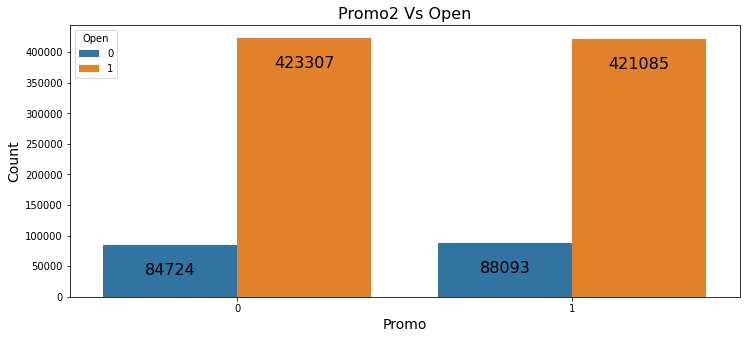

In [49]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Promo2', hue='Open', data=data)
plt.title('Promo2 Vs Open', size=16)
plt.xlabel('Promo', size=14)
plt.ylabel('Count', size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

plt.show()

**State Holiday Vs Store type**

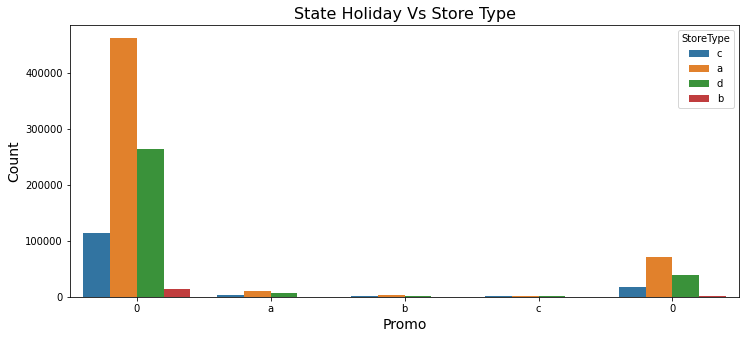

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(x='StateHoliday', hue='StoreType', data=data)
plt.title('State Holiday Vs Store Type', size=16)
plt.xlabel('Promo', size=14)
plt.ylabel('Count', size=14)
plt.show()

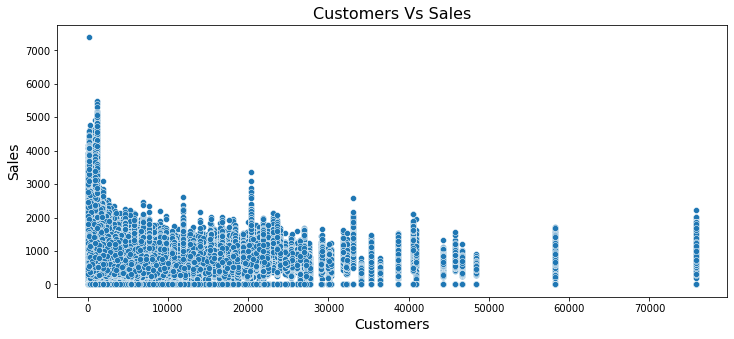

In [51]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='Customers', x='CompetitionDistance', data=data)
plt.title('Customers Vs Sales', size=16)
plt.xlabel('Customers', size=14)
plt.ylabel('Sales', size=14)
plt.show()

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0
Day,1017209.0,15.702790,8.787638,1.0,8.0,16.0,23.0,31.0


**Variance Inflation Factor**

In [53]:
def cal_vif(X):
    
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [54]:
cal_vif(data[[i for i in data.describe().columns if i not in ['Year', 'Month', 'Day', 'Date']]])

,variables,VIF
0,Store,3.580801
1,DayOfWeek,3.125591
2,Sales,22.591554
3,Customers,16.247167
4,Open,8.942812
5,Promo,2.169903
6,SchoolHoliday,1.224010
7,CompetitionDistance,1.557897
8,Promo2,2.039077


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   Year                 1017209 non-null  int64         
 10  Month                1017209 non-null  int64         
 11  Day                  1017209 non-null  int64         
 12  StoreType            1017209 non-null  object        
 1

**Onehot Ecoding**

In [56]:
#conversion of cateforical features
state_holiday = pd.get_dummies(data['StateHoliday'], drop_first=True)
store_type = pd.get_dummies(data['StoreType'], drop_first=True)
assortment = pd.get_dummies(data['Assortment'], drop_first=True)

In [57]:
#including the converted features by dropping the same as respective
data = pd.concat([data, state_holiday, store_type, assortment], axis=1)
data.drop(columns=['StateHoliday', 'StoreType', 'Assortment', 'Date'], inplace=True)
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,CompetitionDistance,Promo2,0,a,b,c,b,c,d,b,c
0,1,5,5263,555,1,1,1,2015,7,31,1270.0,0,1,0,0,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,2015,7,31,570.0,1,1,0,0,0,0,0,0,0,0
2,3,5,8314,821,1,1,1,2015,7,31,14130.0,1,1,0,0,0,0,0,0,0,0
3,4,5,13995,1498,1,1,1,2015,7,31,620.0,0,1,0,0,0,0,1,0,0,1
4,5,5,4822,559,1,1,1,2015,7,31,29910.0,0,1,0,0,0,0,0,0,0,0


In [58]:
#defining dependent and independent variables

dependent_variable = 'Sales'
independent_variable = list(set(data.columns)-{dependent_variable})

In [59]:
#defining X and y varaibles 
y = data[dependent_variable]
X = data[independent_variable]

,Promo2,Year,Day,b,b,b,CompetitionDistance,d,Customers,c,c,c,Open,a,0,DayOfWeek,Store,Month,Promo,SchoolHoliday
0,0,2015,31,0,0,0,1270.0,0,555,0,1,0,1,0,1,5,1,7,1,1
1,1,2015,31,0,0,0,570.0,0,625,0,0,0,1,0,1,5,2,7,1,1
2,1,2015,31,0,0,0,14130.0,0,821,0,0,0,1,0,1,5,3,7,1,1
3,0,2015,31,0,0,0,620.0,0,1498,0,1,1,1,0,1,5,4,7,1,1
4,0,2015,31,0,0,0,29910.0,0,559,0,0,0,1,0,1,5,5,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1,2013,1,0,0,0,1900.0,0,0,0,0,0,0,1,0,2,1111,1,0,1
1017205,0,2013,1,0,0,0,1880.0,0,0,0,1,1,0,1,0,2,1112,1,0,1
1017206,0,2013,1,0,0,0,9260.0,0,0,0,0,1,0,1,0,2,1113,1,0,1
1017207,0,2013,1,0,0,0,870.0,0,0,0,0,1,0,1,0,2,1114,1,0,1


# **Data preparation**

In [60]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [61]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (813767, 20)
Size of X_test is: (203442, 20)
Size of y_train is: (813767,)
Size of y_test is: (203442,)


In [63]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Implementation**

# **Linear Regression Model**

In [64]:
#Creating the Linear regression object
regressor = LinearRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
#linear regression scoe
regressor.score(X_train, y_train)

0.9006701662380696

In [66]:
#defining the predicted values 
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

**Model Evaluation**

In [67]:
#Evaluating the training dataset
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 1473080.655246365
RMSE= 1213.7053411954505
R2_Score= 0.9006701662380696


In [68]:
##Evaluating the test dataset
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 1488637.608160531
RMSE= 1220.0973765075191
R2_Score= 0.8993401767895278


**Plotting of Outputs**

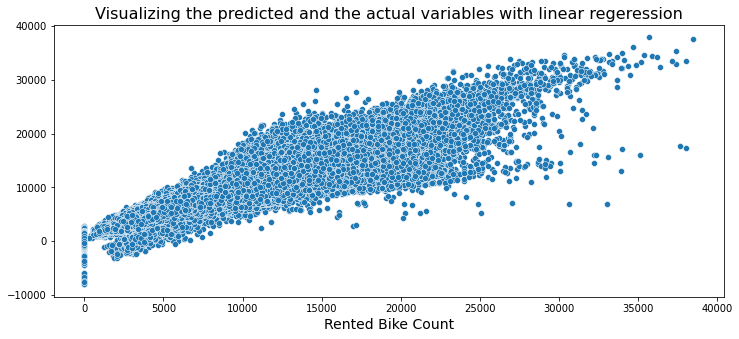

In [69]:
#plotting training dataset
plt.figure(figsize=(12, 5))
sns.scatterplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

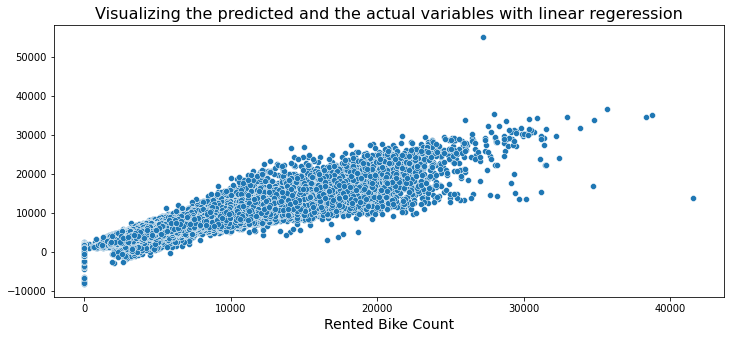

In [70]:
#ploting the testdataset
plt.figure(figsize=(12, 5))
sns.scatterplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

# **Random Forest Regression**

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
#implementing the model
rf_reg = RandomForestRegressor(random_state=42)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

**Model Evaluation**

In [74]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 28249.676558591695
RMSE= 168.07640095680208
R2_Score= 0.9980951242103414


In [75]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 207740.46867936465
RMSE= 455.78555119635445
R2_Score= 0.9859528479353918


**Plotting of outputs**

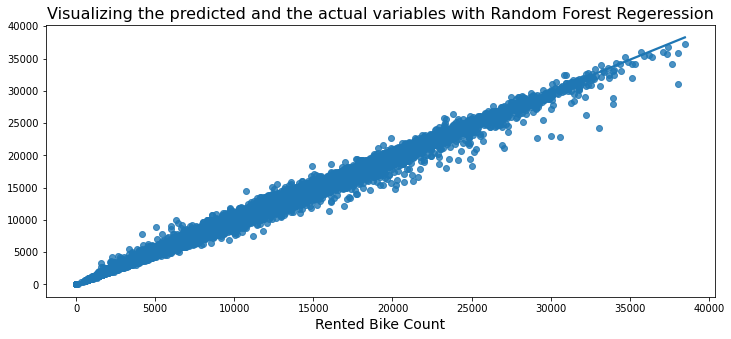

In [76]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

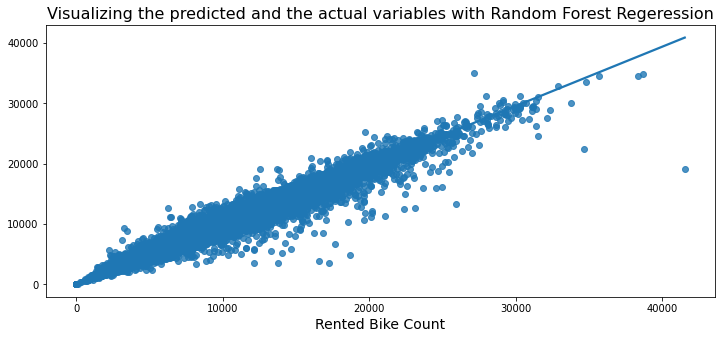

In [77]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

# **Stochastic Gradient Descent**